### 這堂課目標
#### 資料科學中最枯燥&需要花最多時間的事情（60~70%）
<li>EDA (Exploratory data analysis) **這堂課不會討論
<li>Data Cleaning：缺失值、錯誤值、離群值、重複值
<li>Transformation：One-hot Encoding, Normalization, logarithm, 
<li>Feature Engineering：case by case

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('grade.csv')
df.head()

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,4/8/2017 6:44:01,1,6.0,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,4/7/2017 10:40:45,K,NaN,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,4/7/2017 10:41:56,1,NaN,March,27,96,42,99,98,NaN,NaN,Maybe
3,4/7/2017 10:43:31,K,NaN,September,23,97,40,99,98,NaN,NaN,NaN
4,4/10/2017 10:18:34,K,22.0,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 12 columns):
Timestamp                     117 non-null object
Entering Grade Level          117 non-null object
District                      101 non-null float64
Birth Month                   117 non-null object
OLSAT Verbal Score            117 non-null object
OLSAT Verbal Percentile       117 non-null object
NNAT Non Verbal Raw Score     117 non-null object
NNAT Non Verbal Percentile    117 non-null int64
Overall Score                 117 non-null int64
School Preferences            75 non-null object
School Assigned               29 non-null object
Will you enroll there?        71 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 11.0+ KB


#### 缺失值處理有幾種方法
<ol>
    <li>另外標記(另外開一個feature/column紀錄，並在原本的欄位加上0 or missing) *沒資料也是一種資料</li>
    <li>用平均數填補</li>
    <li>維持不動</li>
</ol>


In [11]:
df['District_missing'] = np.isnan(df.District)*1

In [13]:
df['District']=df.District.fillna(0)

#### 錯誤值要修正或移除

In [16]:
df['Entering Grade Level'].unique()

array(['1', 'K', '2', '3'], dtype=object)

In [17]:
df['District'].unique()

array([ 6.,  0., 22., 11.,  3., 26., 28.,  2.,  1., 15., 25., 14., 20.,
       32., 21., 24., 17., 30., 31.,  4.])

In [18]:
df['Birth Month'].unique()

array(['September', 'August', 'March', 'April', 'May', 'February',
       'October', 'June', 'December', 'July', 'January', 'November'],
      dtype=object)

In [19]:
df['OLSAT Verbal Percentile'].unique()

array(['99', '96', '97', '98', '81', '77', '86', '89', '87', '55', '83',
       '88', '79', '95', '90', '69', '94', '~70', '93', '84'],
      dtype=object)

In [30]:
temp = []
for i in df['OLSAT Verbal Percentile']:
    if i=='~70':
        temp.append(70)
    else:
        temp.append(int(i))
df['OLSAT Verbal Percentile']=temp
df['OLSAT Verbal Percentile'].unique()

array([99, 96, 97, 98, 81, 77, 86, 89, 87, 55, 83, 88, 79, 95, 90, 69, 94,
       70, 93, 84])

In [31]:
df['OLSAT Verbal Score'].unique()

array(['28', '25', '27', '23', '24', '26', '29', '17', '21', '32', '19',
       '24/30', '13', '18', '23/30', '22', '17/30', '20', '99', '90',
       '30', '35', 'Fill out later.', '19/30', '83', '**', '-', '97'],
      dtype=object)

In [38]:
temp = []
for i in df['OLSAT Verbal Score']:
    if i.isdigit():
        temp.append(int(i))
    elif '/' in i:
        temp.append(int(i[:2]))
    else:
        temp.append(np.nan)
df['OLSAT Verbal Score']=temp
df['OLSAT Verbal Score'].unique()

array([28., 25., 27., 23., 24., 26., 29., 17., 21., 32., 19., 13., 18.,
       22., 20., 99., 90., 30., 35., nan, 83., 97.])

In [39]:
df['NNAT Non Verbal Percentile'].unique()

array([99, 98, 90, 93, 95])

In [40]:
df['NNAT Non Verbal Raw Score'].unique()

array(['45', '39', '42', '40', '38', '36', '44', '48', '43', '46', '41',
       '47', '36/48', '27', '37', '40/48', '35', '33', '34', '99', '90',
       '39/48', 'Fill out later.', '41/48', '**', '-', '97'], dtype=object)

In [41]:
temp = []
for i in df['NNAT Non Verbal Raw Score']:
    if i.isdigit():
        temp.append(int(i))
    elif '/' in i:
        temp.append(int(i[:2]))
    else:
        temp.append(np.nan)
df['NNAT Non Verbal Raw Score']=temp
df['NNAT Non Verbal Raw Score'].unique()

array([45., 39., 42., 40., 38., 36., 44., 48., 43., 46., 41., 47., 27.,
       37., 35., 33., 34., 99., 90., nan, 97.])

In [42]:
df['Overall Score'].unique()

array([99, 98, 95, 94, 96, 76, 90, 97, 92, 93, 91])

In [43]:
df['School Preferences'].unique()

array(['NEST+m, TAG, Anderson, Q300', 'Anderson, NEST+m', nan,
       'Brooklyn School of Inquiry', 'Anderson NEST TAG Q300',
       'Nest+M, Anderson', 'Any citywide or district 3 school', 'PS121 ',
       'Anderson', 'Anderson, NEST+M, Lower Lab', 'PS Q203',
       'Likely staying in zoned schools; D15 G&T options are limited.',
       'TBD', 'Nest', 'Tag', 'PS229', 'Anderson, Tag Young, Nest+M',
       'Any city-wide', 'PS188', 'BSI', 'NEST+M', 'Nest+m, BSI',
       'NEST, LL, Anderson, TAG, 130,11,124,33', 'Nest+m, PS144, PS174',
       'Anderson, NEST, PS 77, TAG ', 'na',
       'Anderson, NEST, TAG, PS77, PS33, PS11', 'p.s.203q', 'Q300',
       'NEST, Anderson, 30th Av', 'Anderson,NEST+m,LL,PS11',
       'PS50,PS229,PS205,PS53', 'Anderson, Nest, Tag, LL', 'PS11',
       'LL, 198, 11, 130, 217, 124, 33', 'Anderson, nestM, lower lab',
       'nest+m, BSI, Anderson, Q300', 'nest, bsi, anderson', '316, 38, ',
       '144, 174', 'Nest, Anderson', 'Anderson (Sibling)', '11,198,33',
   

In [44]:
df['School Assigned'].unique()

array(['NEST', nan, 'Currently - local Brooklyn dual language', 'PS 203',
       'PS Q203', '175', 'PS 32 Q', 'Anderson', 'PS 158', 'none', 'PS130',
       'TAG', 'Brooklyn School of Inquiry', '163', 'None', 'PS 163',
       'Q300', 'Lower Lab', 'PS166', 'PS 166', 'Lower lab (off waitlist)',
       'Ps205', 'Ps102', 'Ps33'], dtype=object)

In [45]:
df['Will you enroll there?'].unique()

array(['YES', 'Maybe', nan, 'Yes', 'No'], dtype=object)

In [46]:
temp = []
for i in df['Will you enroll there?']:
    if i=="YES":
        temp.append(1)
    elif i=="Yes":
        temp.append(1)
    elif i=='No':
        temp.append(0)
    elif i=='Maybe':
        temp.append(np.nan)
    else:
        temp.append(np.nan)
df['Will you enroll there?']=temp
df['Will you enroll there?'].unique()

array([ 1., nan,  0.])

#### 離群值要評估是否需要移除

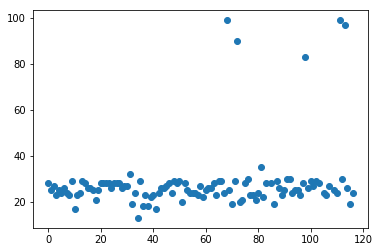

In [47]:
plt.scatter(np.arange(len(df)),df['OLSAT Verbal Score'])

In [48]:
df['OLSAT Verbal Score'].unique()

array([28., 25., 27., 23., 24., 26., 29., 17., 21., 32., 19., 13., 18.,
       22., 20., 99., 90., 30., 35., nan, 83., 97.])

In [54]:
df['OLSAT Verbal Score'][31]>30
df['OLSAT Verbal Percentile'][31]

97

In [60]:
temp = []
for i in range(len(df)):
    if df['OLSAT Verbal Score'][i]>30:
        percent = df['OLSAT Verbal Percentile'][i]
        data = df[(df['OLSAT Verbal Score']<30) & (df['OLSAT Verbal Percentile']==percent)]
        temp.append(int(np.average(data['OLSAT Verbal Score'])))
    else:
        temp.append(df['OLSAT Verbal Score'][i])
df['OLSAT Verbal Score']=temp

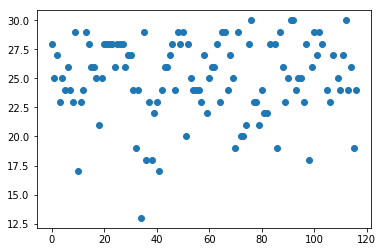

In [61]:
plt.scatter(np.arange(len(df)),df['OLSAT Verbal Score'])

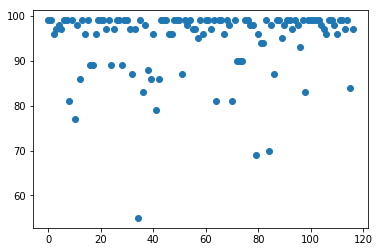

In [62]:
plt.scatter(np.arange(len(df)),df['OLSAT Verbal Percentile'])

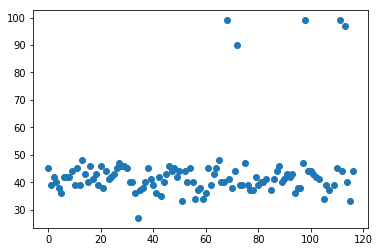

In [63]:
plt.scatter(np.arange(len(df)),df['NNAT Non Verbal Raw Score'])

In [64]:
temp = []
for i in range(len(df)):
    if df['NNAT Non Verbal Raw Score'][i]>48:
        percent = df['NNAT Non Verbal Percentile'][i]
        data = df[(df['NNAT Non Verbal Raw Score']<48) & (df['NNAT Non Verbal Percentile']==percent)]
        temp.append(int(np.average(data['NNAT Non Verbal Raw Score'])))
    else:
        temp.append(df['NNAT Non Verbal Raw Score'][i])
df['NNAT Non Verbal Raw Score']=temp

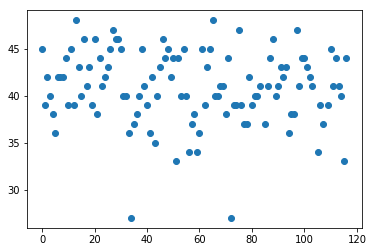

In [65]:
plt.scatter(np.arange(len(df)),df['NNAT Non Verbal Raw Score'])

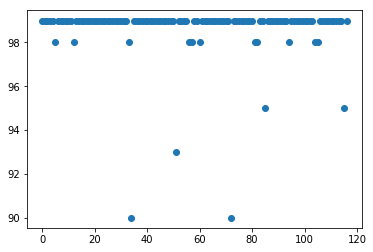

In [66]:
plt.scatter(np.arange(len(df)),df['NNAT Non Verbal Percentile'])

#### 重複值要移除（如果是整理好的資料不太會有這個問題，但若是爬蟲或是未整理的資料就要檢查）

In [ ]:
#無

#### One hot encoding：最基本將類別資料轉換成數值資料的方法

In [71]:
df = pd.concat([df,pd.get_dummies(df['Entering Grade Level'].to_frame())],axis=1)
df = pd.concat([df,pd.get_dummies(df['Birth Month'].to_frame())],axis=1)

In [73]:
df = df.drop(['Entering Grade Level','Birth Month'],axis=1)

#### Feature engineering：依照個人對問題的理解，去增減feature以協助模型訓練
<ol>
    <li>基本：feature互相數學運算</li>
    <li>基本：將文字資料/日期資料拆解開來</li>
    <li>進階：將不同資料的關係串聯再一起（e.x.同一個用戶的不同資料、時間序的資料）</li>
    <li>進階：引入外部資料合併到原有資料內</li>
</ol>

#### 作業：
針對MetObjects_10000進行下列處理
<ol>
    <li>把"Is Highlight", "Is Public Domain", "Is Timeline Work"轉換成0或1</li>
    <li>把全NaN的欄位移除掉</li>
    <li>把Department做「one hot encoding」</li>
    <li>Artist Gender整理（有female就是female，只有直槓改為male）</li>
    <li>Artist begin date 用最小且合理的數值, Artist end date 用最大且合理的數值</li>

In [128]:
df = pd.read_csv('MetObjects_10000.csv')

In [77]:
print(df.shape)
df.columns

(10000, 51)


Index(['Object Number', 'Is Highlight', 'Is Public Domain', 'Is Timeline Work',
       'Object ID', 'Department', 'AccessionYear', 'Object Name', 'Title',
       'Culture', 'Period', 'Dynasty', 'Reign', 'Portfolio', 'Artist Role',
       'Artist Prefix', 'Artist Display Name', 'Artist Display Bio',
       'Artist Suffix', 'Artist Alpha Sort', 'Artist Nationality',
       'Artist Begin Date', 'Artist End Date', 'Artist Gender',
       'Artist ULAN URL', 'Artist Wikidata URL', 'Object Date',
       'Object Begin Date', 'Object End Date', 'Medium', 'Dimensions',
       'Credit Line', 'Geography Type', 'City', 'State', 'County', 'Country',
       'Region', 'Subregion', 'Locale', 'Locus', 'Excavation', 'River',
       'Classification', 'Rights and Reproduction', 'Link Resource',
       'Object Wikidata URL', 'Metadata Date', 'Repository', 'Tags',
       'Tags AAT URL'],
      dtype='object')

In [137]:
np.isnan(df.Period.unique())==True

array([ True])

In [133]:
np.array([np.nan])==np.array([np.nan])

array([False])

In [144]:
df['Object Number'].dtype=='O'

True

In [148]:
df['Period'].dtype=='float64'
np.

True

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
Object Number              10000 non-null object
Is Highlight               10000 non-null bool
Is Public Domain           10000 non-null bool
Is Timeline Work           10000 non-null bool
Object ID                  10000 non-null int64
Department                 10000 non-null object
AccessionYear              9662 non-null float64
Object Name                10000 non-null object
Title                      10000 non-null object
Culture                    8291 non-null object
Period                     0 non-null float64
Dynasty                    0 non-null float64
Reign                      0 non-null float64
Portfolio                  0 non-null float64
Artist Role                4726 non-null object
Artist Prefix              1242 non-null object
Artist Display Name        4726 non-null object
Artist Display Bio         4349 non-null object
Artist Suffix              48 non-